In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, metrics
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import sklearn
from sklearn.metrics import classification_report

In [21]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
#%%

# Step 1
# Importing the data

#%%

df = pd.read_csv("/content/drive/MyDrive/fer2013.csv")
# df = pd.read_csv("./data/fer2013/fer2013/fer2013.csv")

#%%

#  (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).
print("Emotions: ", set(df['emotion']))

emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]



Emotions:  {0, 1, 2, 3, 4, 5, 6}


In [23]:
#%%

# Checking if data needs to be cleaned
sum_ = 0
for col in df.columns:
    sum_ += df[col].isnull().sum()
print(sum_)

#%%

# No missing values, and a quick glance through the entries tells me we should be good
# Let's display some images, and find out what emotions 0-6 represent



0


In [24]:
#%%

"""
    Turns strings into intiger arrays or matrices
    if matrix_boolean=True, a matrix is returned
    if normalize_boolean=True, each value is between [0, 1] instead of [0, 255]
    when nparray_boolean is true, a np.array() is returned, otherwise a list (same goes for matrix format)  
"""
def string_to_intarray(pix, matrix_boolean=True, normalize_boolean=False, nparray_boolean=True):
    # The string is shaped: "num1 num2 num3 ... numn"
    # Splitting at each space gives a list ["num1", "num2", ..., "numn"]
    pix = pix.split(" ")

    # Creating a numpy array by reading each number string p as an integer
    pix = np.array([int(p) for p in pix])

    # # Checking the shape to decide on the matrix format
    # print(pix.shape)

    # Dataset metadata says pictures are 48x48 -> rescale
    if matrix_boolean:
        pix = pix.reshape((48, 48, 1))
    # print(pix.shape)

    # for tensorflow we need values in range [0, 1] not [0, 255]
    if normalize_boolean:
        pix = pix/255

    # apparently tensorflow doesn't want nparrays, just matrices
    if not nparray_boolean:
        pix = pix.tolist()

    return pix

# Loading a set of pixels from the dataset, as a string
pix = df["pixels"].iloc[0]
pix = string_to_intarray(pix, True)



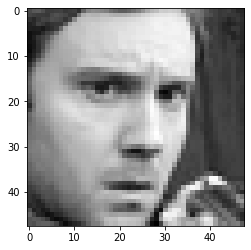

In [25]:
#%%

# Looking good
pix = pix.reshape(48, 48)
plt.imshow(pix, cmap='gray')



In [26]:
#%%
# TODO use numpy method to reshape data x.split().astype(float) and change iterrows to np.array(x.split()).flatten().astype(float).reshape(48, 48, 1)
# Complete preprocessing. All pixel entries should be vectors of integers
# for index, row in df.iterrows():
#     row[1] = np.array(row[1].split(" ")).astype(float).reshape(48, 48, 1)  #string_to_intarray(row[1], True, True, True)
#     df.iloc[index] = row


# Fatser alternative to string_to_intarray()
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split()).flatten().astype(float).reshape(48, 48, 1))


In [27]:
#%%

# Step 2: Parsing the data to h5py format as mentioned in the assignment
# Tensorflow should have readily available methods

# Update: Looks like tensorflow doesn't need h5py
# Create training and testing dataframes
# df_train = all rows of df where Usage=="Training"
df_train = df[df["Usage"]=="Training"]
# Sanity check
print(set(df_train["Usage"]))

# repeating process for the test sets
print(set(df["Usage"]))
df_prt = df[df["Usage"]=="PrivateTest"]
df_put = df[df["Usage"]=="PublicTest"]


#%%

# df_train["pixels"].iloc[0]



{'Training'}
{'PrivateTest', 'Training', 'PublicTest'}


In [ ]:
# # Following along with a tutorial for this part https://www.tensorflow.org/tutorials/load_data/csv
# # Turning the training set into a pixels array and a labels array

# # Slicing the start only s.t. running times are lower
# train_pix = list(df_train["pixels"])
# train_labels = list(df_train["emotion"])


# test_pr_pix = list(df_prt["pixels"])
# test_pr_labels = list(df_prt["emotion"])
# test_pu_pix = list(df_put["pixels"])
# test_pu_labels = list(df_put["emotion"])




In [28]:
# Set to a np.array() of the right shape
train_pix = np.stack(df_train['pixels'])
# Set to a one hot encoding
train_labels = np.array(pd.get_dummies(df_train['emotion']))

# Repeat
test_pr_pix = np.stack(df_prt['pixels'])
test_pr_labels = np.array(pd.get_dummies(df_prt['emotion']))

test_pu_pix = np.stack(df_put['pixels'])
test_pu_labels = np.array(pd.get_dummies(df_put['emotion']))

# Checking shapes
print(train_pix.shape)
print(train_pix[0].shape)
print(train_labels.shape)
print(train_labels[0].shape)




(28709, 48, 48, 1)
(48, 48, 1)
(28709, 7)
(7,)


In [ ]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(7, activation='softmax'))
# model.summary()


In [38]:


'''
Labels is a list of the actual emotions, in one-hot format
Results is the list of predictions from the model
'''
def analyze_results(labels, results, title):
  print('XHWXL')
  # acc_score = sklearn.metrics.accuracy_score(labels, results)
  # print("Accuracy: %f" % acc_score)
  print(labels.shape, results.shape)
  print(labels)
  print(results)

  c_report = classification_report(labels, results, output_dict=True)
  
  print(c_report)
 
  

  

  dataframe = pd.DataFrame.from_dict(c_report)
  dataframe.to_csv(title, index = True)
  # print("Classification report: ", c_report)
  # prec_score = sklearn.metrics.precision_score(labels, results)
  # print("Precision: %f" % prec_score)
  
  # rec_score = sklearn.metrics.recall_score(labels, results)
  # print("Recall: %f" % rec_score)

  # Can't do ROC for multiclass classification
  # ROC_score = sklearn.metrics.roc_auc_score(labels, results)
  # print("ROC: %f" % ROC_score)

# Visualize feature maps after first hidden convolutional layer
# TODO: does not work yet -> fix
def visualize_filters(m, img):
  # model = models.Model(inputs=m.inputs, outputs=m.layers[1].output)
  # feature_maps = model.predict(img)
  # square = 8
  # ix = 1
  # for _ in range(square):
  #   for _ in range(square):
  #     # specify subplot and turn of axis
  #     ax = pyplot.subplot(square, square, ix)
  #     ax.set_xticks([])
  #     ax.set_yticks([])
  #     # plot filter channel in grayscale
  #     pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
  #     ix += 1
  # # show the figure
  # pyplot.show()
  
  
  filt_list = []

  for lay in m.layers:
    if 'conv' in lay.name:
      filt, bias = lay.get_weights()
      filt_list.append((lay.name, filt))
      print(lay.name, " filter shape = ", filt.shape)
      # Normalize to [0, 1]
      f_min, f_max = filt.min(), filt.max()
      filt = (filt - f_min) / (f_max - f_min)
      idx = 1
      # get the filters
      n = filt.shape[-1]
      for i in range(n):
        f = filt[:, :, :, i]
        # plot each channel separately
        
        for j in range(filt.shape[-2]):
          # specify subplot and turn of axis
          ax = plt.subplot(round(np.sqrt(n)), round(np.sqrt(n)), idx)
          ax.set_xticks([])
          ax.set_yticks([])
          # plot filter channel in grayscale
          plt.imshow(f[:, :, j], cmap='gray')
          idx += 1
      # show the figure
      plt.show()



In [ ]:
# model = models.Sequential([
#     conv_layer(32, (3, 3), (48, 48, 1), 'relu'), 
#     m_p_layer((2, 2)), 
#     conv_layer(64, (3, 3), 'relu'), 
#     # m_p_layer((2, 2)),
#     conv_layer(128, (3, 3), 'relu'), 
#     m_p_layer((2, 2)),
#     flat_layer(), 
#     dense_layer(64, 'relu'), 
#     dense_layer(128, 'relu'),
#     dense_layer(7)
#     ])
# model.summary()

In [ ]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# model.fit(train_pix, train_labels, batch_size=32, epochs=10,  
#                     validation_data=(test_pr_pix, test_pr_labels))



In [ ]:
# predictions = model.predict(test_pu_pix)





In [ ]:

# print(predictions)
# from sklearn.metrics import classification_report

# one_hot_p = []
# num_p = []
# for p in predictions:
#   temp = np.zeros(7, dtype=int)
#   index = np.argmax(p)
#   temp[index] = 1
#   one_hot_p.append(temp)
#   num_p.append(index)

# one_hot_p = np.array(one_hot_p)
# num_p = np.array(num_p)

In [ ]:
# # analyze_results(test_pu_labels, one_hot_p)
# analyze_results(np.array(df_put['emotion']), num_p, "test.csv")
# # print(np.array(np.where(num_p == np.array(df_put['emotion']))).shape)

{'0': {'precision': 0.34959349593495936, 'recall': 0.3683083511777302, 'f1-score': 0.3587069864442128, 'support': 467}, '1': {'precision': 0.5, 'recall': 0.23214285714285715, 'f1-score': 0.3170731707317073, 'support': 56}, '2': {'precision': 0.3602941176470588, 'recall': 0.2963709677419355, 'f1-score': 0.32522123893805305, 'support': 496}, '3': {'precision': 0.6776765375854215, 'recall': 0.664804469273743, 'f1-score': 0.6711787930062042, 'support': 895}, '4': {'precision': 0.36376210235131395, 'recall': 0.40275650842266464, 'f1-score': 0.38226744186046513, 'support': 653}, '5': {'precision': 0.712401055408971, 'recall': 0.6506024096385542, 'f1-score': 0.6801007556675063, 'support': 415}, '6': {'precision': 0.4011713030746706, 'recall': 0.4514003294892916, 'f1-score': 0.4248062015503876, 'support': 607}, 'accuracy': 0.4831429367511842, 'macro avg': {'precision': 0.4806998017146279, 'recall': 0.4380551275552537, 'f1-score': 0.45133636974264807, 'support': 3589}, 'weighted avg': {'precisi

In [30]:
#  Methods to automize the architecture tuning
def conv_layer(filt, k_size, acti='relu', inp_shape=None):
  if inp_shape is not None:
    return layers.Conv2D(
        filters = filt,
        kernel_size = k_size,
        input_shape = inp_shape,
        activation = acti
    )
  else:
    return layers.Conv2D(
        filters = filt,
        kernel_size = k_size,
        activation = acti
    )

def dense_layer(size, activ='softmax'):
  return layers.Dense(
      size, 
      activation = activ
  )
  
def m_p_layer(k_size):
  return layers.MaxPooling2D(
      k_size
  )

def flat_layer():
  return layers.Flatten()


def experiment(train_x, train_y, val_x, val_y, test_x, test_y, conv_layer, m_p_layer, flat_layer, dense_layer):
  model_architectures = []
  titles = []

  conv = {"input": conv_layer(32, (3,3), 'relu', (48, 48, 1)), "input 64": conv_layer(64, (3,3), 'relu', (48, 48, 1)), "input 128": conv_layer(128, (3,3), 'relu', (48, 48, 1)),"input 256": conv_layer(256, (3,3), 'relu', (48, 48, 1)), "32": conv_layer(32, (3,3)), "64": conv_layer(64, (3,3)), "64 sigmoid": conv_layer(64, (3,3), 'sigmoid'), "128": conv_layer(128, (3,3)), "256": conv_layer(256, (3,3))}
  pool = {"2": m_p_layer((2,2)), "3": m_p_layer((3,3)), "4": m_p_layer((4,4)), "5": m_p_layer((5,5))}
  dense = {"output": dense_layer(7), "32": dense_layer(32, 'relu'), "64": dense_layer(64, 'relu'), "32 sigmoid": dense_layer(32, 'sigmoid'), "64 sigmoid": dense_layer(64, 'sigmoid'), "128": dense_layer(128), "256": dense_layer(256)}

  # # very small NN
  # model_architectures.append([conv["input"], pool["2"], flat_layer(), dense["32"], dense["output"]])
  # titles.append("conv-in_pool-2_dense-32_dense-out.csv")

  # # More conv layers
  # model_architectures.append([conv["input"], conv["32"], conv["32"], pool["2"], flat_layer(), dense["32"], dense["output"]])
  # titles.append("conv-in_conv-32_conv-32_pool2_dense-32_dense-out.csv")

  # # More conv layers more filters
  # model_architectures.append([conv["input 64"], pool["2"], conv["64"], pool["2"], conv["64"], pool["2"],flat_layer(), dense["32"], dense["output"]])
  # titles.append("conv-in_pool2_conv-64_pool2_conv-64_pool2_dense-32_dense-out.csv")

  # # Adding pool layers
  # model_architectures.append([conv["input 64"], conv["64"], conv["64"],flat_layer(), dense["64"], dense["32"], dense["output"]])
  # titles.append("conv-in_conv-64_conv-64_dense-64_dense-32_dense-out.csv")

  # # "" and extra dense layer
  # model_architectures.append([conv["input 64"], pool["2"], conv["64"], pool["2"], conv["64"], pool["2"],flat_layer(), dense["64"], dense["32"], dense["output"]])
  # titles.append("conv-in_pool2_conv-64_pool2_conv-64_pool2_dense-64_dense-32_dense-out.csv")

  # # Sigmoid activation func
  # model_architectures.append([conv["input 64"], pool["2"], conv["64 sigmoid"], pool["2"], conv["64 sigmoid"], pool["2"],flat_layer(), dense["64 sigmoid"], dense["32 sigmoid"], dense["output"]])
  # titles.append("conv-in_pool-2_conv-64sig_pool-2_conv-64sig_pool2_dense-64sig_dense-32_dense-out.csv")

  # # Lots of filters
  # model_architectures.append([conv["input 128"], pool["2"], conv["128"], pool["2"], conv["128"], pool["2"],flat_layer(), dense["64"], dense["32"], dense["output"]])
  # titles.append("conv-in_pool-2_conv-128_pool-2_conv-128_pool2_dense-128_dense-32_dense-out.csv")

  # # Intentionally overfit
  # model_architectures.append([conv["input 64"], pool["2"], conv["64"], pool["2"], conv["64"], pool["2"],flat_layer(), dense["64"], dense["128"], dense["256"], dense["output"]])
  # titles.append("conv-in_pool-2_conv-64_pool-2_conv-64_pool2_dense-64_dense-128_dense_256_dense-out.csv")
  
  # # Show dropout layers
  # model_architectures.append([conv["input 64"], pool["2"], conv["64"], pool["2"], conv["64"], pool["2"],flat_layer(), dense["64"], dense["128"], dense["256"], layers.Dropout(0.3), dense["output"]])
  # titles.append("conv-in_pool-2_conv-64_pool-2_conv-64_pool2_dense-64_dense-128_dense_256_dropout0.3_dense-out.csv")
  
  # Final model
  model_architectures.append([conv["input 128"], pool["2"], conv["128"], layers.BatchNormalization(), pool["2"], conv["128"], pool["2"], conv["128"], pool["2"], flat_layer(), dense["64"], dense["32"], dense["output"]])
  titles.append("Final Model.csv")
  
  
  print(val_x.shape, val_y.shape)
  for i in range(len(model_architectures)):
    title = titles[i]
    print(title)
    model = models.Sequential(model_architectures[i])
    model.summary()
    
    model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    model.fit(train_x, train_y, batch_size=32, epochs=40,  
                    validation_data=(val_x, val_y))
    predictions = model.predict(test_x)
    num_p = np.array([np.argmax(p) for p in predictions])
    test_yy = np.array([np.argmax(p) for p in test_y])

    # b = np.zeros((num_p.size, num_p.max()+1))
    # b[np.arange(num_p.size),num_p] = 1

    # c = np.zeros((val_yy.size, val_yy.max()+1))
    # c[np.arange(val_yy.size), val_yy] = 1
    # print(b.shape)
    # print(c.shape)
    analyze_results(test_yy, num_p, title)
    return model
model = experiment(train_pix, train_labels, test_pr_pix, test_pr_labels, test_pu_pix, test_pu_labels, conv_layer, m_p_layer, flat_layer, dense_layer)

(3589, 48, 48, 1) (3589, 7)
Final Model.csv
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 46, 46, 128)       1280      
_________________________________________________________________
max_pooling2d_20 (MaxPooling multiple                  0         
_________________________________________________________________
conv2d_52 (Conv2D)           multiple                  147584    
_________________________________________________________________
batch_normalization_9 (Batch (None, 21, 21, 128)       512       
_________________________________________________________________
flatten_5 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_36 (

In [68]:
indices = np.random.randint(len(df['pixels']), size=12)


[[[154.]
  [153.]
  [154.]
  ...
  [100.]
  [ 97.]
  [ 96.]]

 [[158.]
  [157.]
  [156.]
  ...
  [102.]
  [101.]
  [101.]]

 [[152.]
  [154.]
  [157.]
  ...
  [103.]
  [102.]
  [102.]]

 ...

 [[ 94.]
  [111.]
  [103.]
  ...
  [102.]
  [102.]
  [102.]]

 [[ 82.]
  [107.]
  [101.]
  ...
  [103.]
  [102.]
  [101.]]

 [[ 69.]
  [106.]
  [ 98.]
  ...
  [102.]
  [102.]
  [102.]]]
4 0
[[[ 87.]
  [ 77.]
  [ 45.]
  ...
  [ 95.]
  [ 92.]
  [ 92.]]

 [[ 12.]
  [ 30.]
  [ 37.]
  ...
  [ 93.]
  [ 91.]
  [ 91.]]

 [[  5.]
  [ 24.]
  [ 61.]
  ...
  [ 92.]
  [ 91.]
  [ 88.]]

 ...

 [[ 87.]
  [140.]
  [140.]
  ...
  [ 49.]
  [ 49.]
  [ 50.]]

 [[ 87.]
  [138.]
  [135.]
  ...
  [ 46.]
  [ 47.]
  [ 48.]]

 [[ 79.]
  [135.]
  [136.]
  ...
  [ 45.]
  [ 45.]
  [ 46.]]]
6 6
[[[255.]
  [254.]
  [255.]
  ...
  [254.]
  [254.]
  [255.]]

 [[255.]
  [254.]
  [255.]
  ...
  [254.]
  [254.]
  [255.]]

 [[255.]
  [255.]
  [245.]
  ...
  [255.]
  [253.]
  [255.]]

 ...

 [[126.]
  [160.]
  [132.]
  ...
  [126.]
  

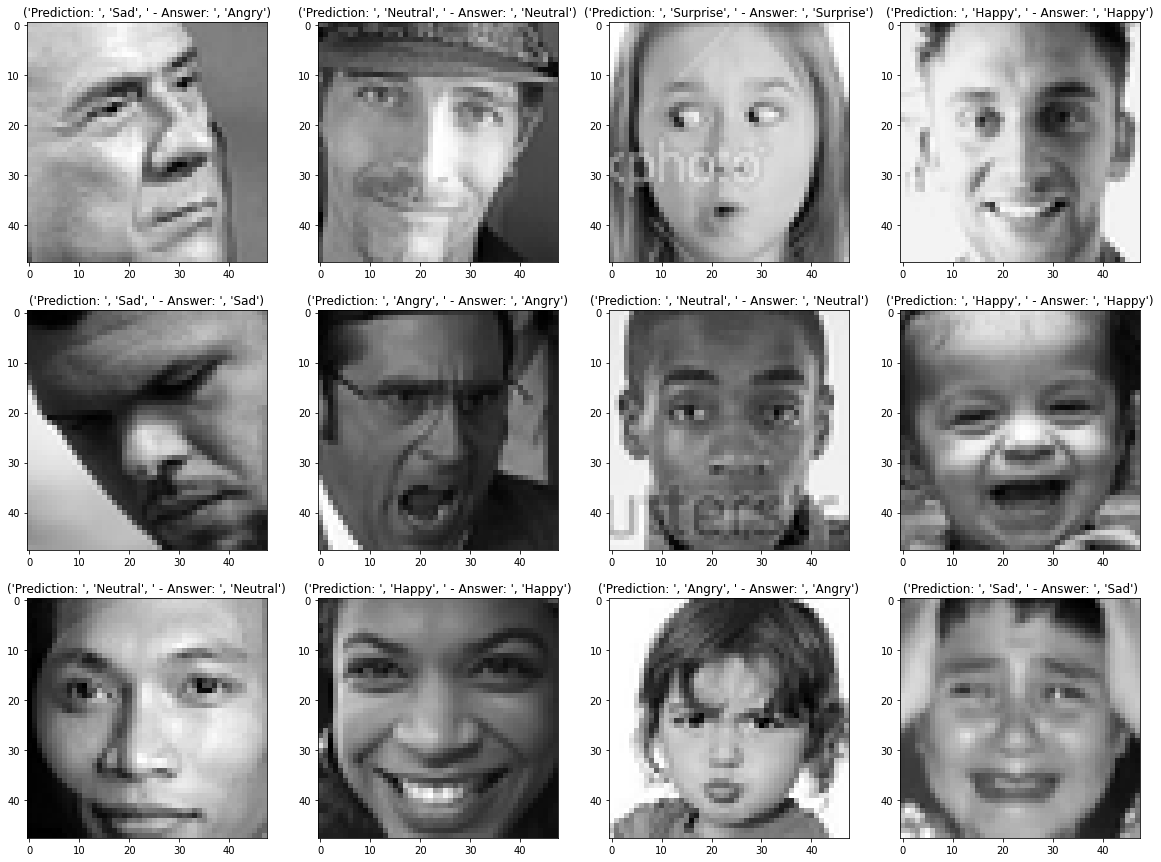

In [69]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3, 4, figsize=(20, 15))
axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]
emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

i = 0
for ax in axs:
  photo = np.array(df['pixels'].iloc[indices[i]]).reshape(48, 48)
  print(photo.reshape(48, 48, 1))
  pred = model.predict(np.array([photo.reshape(48, 48, 1)]))
  predi = np.argmax(pred)
  print(predi, df['emotion'].iloc[indices[i]])
  emotion = int(df['emotion'].iloc[indices[i]])

  ax.imshow(photo, cmap='gray')
  tit = "Prediction: ", emotions[predi], " - Answer: ", emotions[emotion]
  ax.set_title(tit)
  i+= 1